# Numpy

In [2]:
import numpy as np

In [5]:
# 一维数组，向量
A = np.array([1, 2, 3])
B = np.array([1, 0, 4])
print(A)
C = A + B
print(C)
D = A - B
print(D)
E = A * B
print(E)
F = A * 2 # 广播
print(F)

[1 2 3]
[2 2 7]
[ 0  2 -1]
[ 1  0 12]
[2 4 6]


In [6]:
# 二维数组，矩阵
X = np.array([[1, 2], [3, 4]])
print(X)
Y = np.array([[1, 3], [5, 6]])
Z = X + Y
print(Z)
print(X[0]) # 索引
print(X[0][1]) # 索引
X = X.flatten() # 转为一维数组
print(X)
print(X[np.array([0, 3])]) # 使用数组访问各个元素
P = X > 1 # 条件
print(P)
print(X[P])

[[1 2]
 [3 4]]
[[ 2  5]
 [ 8 10]]
[1 2]
2
[1 2 3 4]
[1 4]
[False  True  True  True]
[2 3 4]


In [7]:
# 遍历
X = np.array([[1, 2], [3, 4], [5, 6]])
for row in X:
    print(row)

[1 2]
[3 4]
[5 6]


# Matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

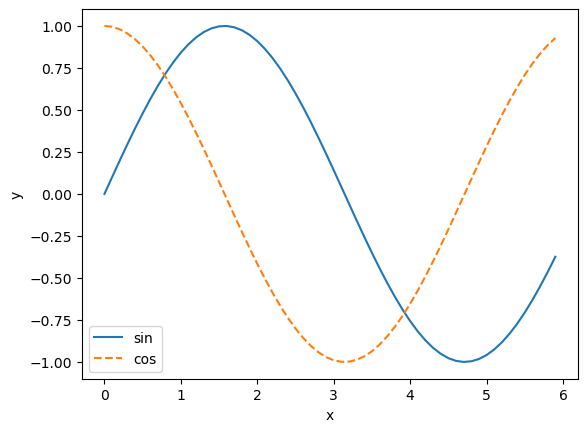

In [11]:
# 绘制sin函数
x = np.arange(0, 6, 0.1) # 单位0.1，生成0到6的数据
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='cos', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

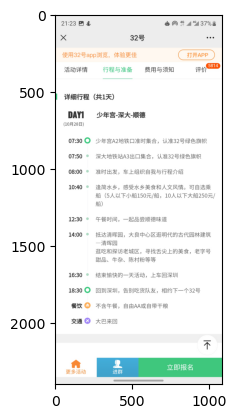

In [14]:
# 显示图像
from matplotlib.image import imread

img = imread('/Users/ryan/Downloads/20231022-212534.jpeg')
plt.imshow(img)
plt.show()

# 感知机
原始公式\
$f(x)=\begin{cases} 0 \quad (w_1*x_1 + w_2*x_2 <= \theta) \\1 \quad (w_1*x_1 + w_2*x_2 > \theta) \end{cases}$ \
使用权重和偏置表示\
$f(x)=\begin{cases} 0 \quad (b + w_1*x_1 + w_2*x_2 <= 0) \\1 \quad (b + w_1*x_1 + w_2*x_2 > 0) \end{cases}$

In [6]:
# 实现感知机——与门
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1
print(AND(0, 1))
print(AND(1, 0))
print(AND(0, 0))
print(AND(1, 1))

# 使用权重和偏置实现
def AND_NP(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = b + np.sum(w*x)
    if tmp <= 0:
        return 0
    else:
        return 1
print(AND_NP(0, 1))
print(AND_NP(1, 0))
print(AND_NP(0, 0))
print(AND_NP(1, 1))


0
0
0
1
0
0
0
1


In [5]:
# 实现感知机——与非门
def NAND(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(0, 0))
print(NAND(1, 1))

1
1
1
0


In [3]:
# 或门
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([1, 1])
    b = -0.7
    tmp = b + np.sum(w*x)
    if tmp <= 0:
        return 0
    else:
        return 1
print(OR(0, 1))
print(OR(1, 0))
print(OR(0, 0))
print(OR(1, 1))

1
1
0
1


# 异或门——多层感知机

In [7]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(0, 0))
print(XOR(1, 1))

1
1
0
0


# 神经网络

## 激活函数

In [6]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
# 阶跃函数
def step_function(x):
    return np.array(x > 0, dtype=np.int16)

In [5]:
x = np.array([-2.0, -1, 1, 2])
x = step_function(x)
print(x)

[0 0 1 1]


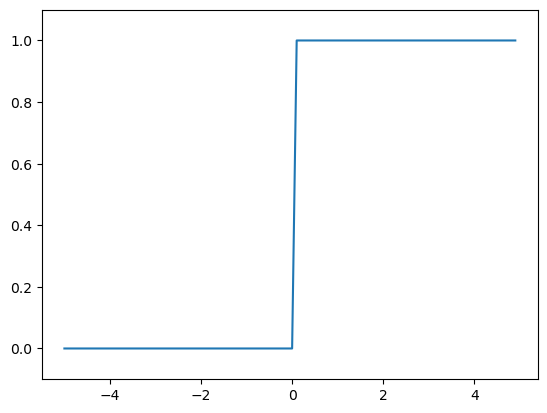

In [7]:
# 画出阶跃函数
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [12]:
# sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
y = sigmoid(x)
print(y)

[0.26894142 0.73105858 0.88079708]


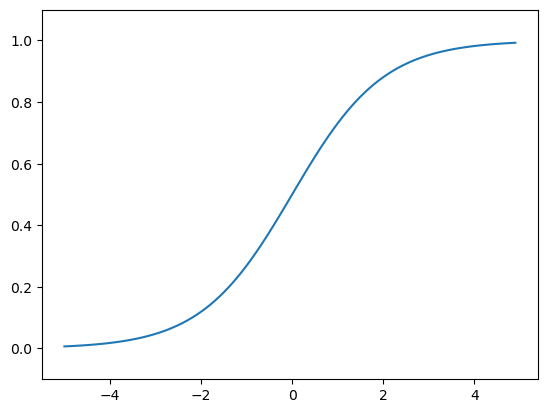

In [14]:
# 画sigmoid
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()